# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 5pm, Thursday 9th April 2020</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own explanatory comment in this cell.
4. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

In [2]:
"""
Import packages needed for processing
"""
import numpy as np   # import the numpy package
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time

"""
If you need add any additional packages, then add them below this line
"""

import math

%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [3]:
# Declare the path to the data file
DATA_FILE = "road_accidents_data_clean.csv" #was no orig

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [4]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['Index', 'Age', 'Year', 'Crash_Month', 'Crash_Day', 'Crash_Time', 'Road_User', 'Gender', 'Crash_Type', 'Injury_Severity', 'Crash_LGA', 'Crash_Area_Type'])


---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['Road_User']
    * data_dict['Age']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [5]:
x = 'the type of "input_file" is ' + str(type(input_file))
print('the type of "input_file" is ' + str(type(input_file)))
print("the type of 'data_dict' is " + str(type(data_dict)))
print("the type of 'data_dict['Road_User']' is " + str(type(data_dict['Road_User'])))
print("the type of 'input_file['Age']' is " + str(type(data_dict['Age'])))

the type of "input_file" is <class 'csv.DictReader'>
the type of 'data_dict' is <class 'dict'>
the type of 'data_dict['Road_User']' is <class 'numpy.ndarray'>
the type of 'input_file['Age']' is <class 'numpy.ndarray'>


In [6]:
x = len(data_dict['Age'])
print("the number of data records in 'data_dict['Age']' is " + str(x))
x = len(data_dict['Road_User'])
print("the number of data records in 'data_dict['Road_User']' is " + str(x))

the number of data records in 'data_dict['Age']' is 115541
the number of data records in 'data_dict['Road_User']' is 115541


---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data. 

**Your task:**
1. Write your code to find and print the minimum and the maximum values in the **Age** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values in the **Year** column. (**1 mark**)
3. Write your code to find and print the mean and median age, and the standard deviation from the **Age** column. (**2 marks**)
4. Write your code to construct a box plot for the **Age**. (**2 marks**) 
4. Briefly describe the meaning of the difference between the mean and median ages. (**4 marks**)

**[Total mark: 10]**

In [7]:
def findMax(inputList):
    maxVal = 0
    for x in range(len(inputList)):
        if inputList[x] > maxVal:
            maxVal = inputList[x]
            index = x
    return maxVal, index
def findMin(inputList):
    minVal = 100000000
    for x in range(len(inputList)):
        if inputList[x] < minVal:
            minVal = inputList[x]
            index = x
    return minVal, index

print("the maximum Age is {} and the minimum is {}".format(findMax(data_dict['Age'])[0], findMin(data_dict['Age'])[0]))

the maximum Age is 79 and the minimum is 16


In [8]:
print("the maximum Year is {} and the minimum is {}".format(findMax(data_dict['Year'])[0], findMin(data_dict['Year'])[0]))

the maximum Year is 2019 and the minimum is 2000


In [9]:
def calcMean(inputList):
    total = 0
    for x in inputList:
        total += x
    return total/len(inputList)
    
def calcStdDev(inputList):
    devs = []
    mean = calcMean(inputList)
    for x in (inputList):
        devs.append((x - mean)**2)
    return math.sqrt(calcMean(devs))

def calcMedian(inputList):
    max = 0
    min = 100000000
    for x in inputList:    
        if x > max:
            max = x
        if x < min:
            min = x
        if max == min:
            return x

print("Median {} is {}".format('Age', calcMedian(data_dict['Age'])))
print("mean {} is {}".format('Age', calcMean(data_dict['Age'])))
print("standard deviation of {} is {}".format('Age', calcStdDev(data_dict['Age'])))

Median Age is 37
mean Age is 40.174050769856585
standard deviation of Age is 18.74189146245561


In [10]:
x = [1, 2, 3]
y = x
y[0] = 0
print(x, y)

[0, 2, 3] [0, 2, 3]


In [11]:
# because the mean is larger than the median the data is said to skew right

---
## **Instruction 3**
The following code segment is designed to examine data from the **Road_User** column. This column provides information about the types of road users involved in road accidents.


**Your tasks**:

1. Write your code to find and print out the number of **unique** road user types. (**2 marks**)
2. Write your code to find and print out the list of road user types that appear more than **16000** times in the dataset. (**2 marks**)
3. Write your code to find and print out the road user type with highest occurrence of accidents. Both the road user type and the number of accidents for the road user type need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable: ***accidents_by_road_user*** whose keys are unique road user types and values are the corresponding counts computed from the dataset. Print the dictionary. (**2 marks**)
5. Plot a bar chart for ***accidents_by_road_user*** sorted in descending order of values. (**2 marks**)

[**Total mark: 10**]

In [12]:
def findUniqueObjects(objects):
    uniqueObj = []
    for obj in objects:
        isUnique = True
        for x in uniqueObj:
            if len(uniqueObj) == 0:
                newObj = obj
            elif x == obj:
                isUnique = False
        if isUnique:
            uniqueObj.append(obj)
    return uniqueObj

findUniqueObjects(data_dict['Road_User'])

['PEDESTRIAN', 'DRIVER', 'PASSENGER', 'UNKNOWN', 'MOTORCYCLIST', 'BICYCLIST']

In [13]:
def createObjectsDict(objects):
    items = findUniqueObjects(objects)
    itemsDict = {}
    for x in items:
        itemsDict[x] = 0
    return itemsDict

def countObjects(objects):
    itemsDict = createObjectsDict(objects)
    for x in objects:
        itemsDict[x] += 1
    return itemsDict

def excludeAllBelowCount(objects, minimum):
    items = countObjects(objects)
    passedItems = {}
    for x in items:
        if items[x] > minimum:
            passedItems[x] = items[x]
    return passedItems

print(excludeAllBelowCount(data_dict['Road_User'], 16000))

{'DRIVER': 53000, 'PASSENGER': 22543, 'MOTORCYCLIST': 18474}


In [14]:
def findHighestCount(objects):
    items = countObjects(objects)
    highest = -1
    for x in items:
        if highest == -1:
            highest = x
        elif items[x] > items[highest]:
            highest = x
    highestItem = {highest, items[highest]}
    return highestItem

print(findHighestCount(data_dict['Road_User']))

{53000, 'DRIVER'}


In [15]:
accidents_by_road_user = countObjects(data_dict['Road_User'])
print(accidents_by_road_user)


{'PEDESTRIAN': 12544, 'DRIVER': 53000, 'PASSENGER': 22543, 'UNKNOWN': 2704, 'MOTORCYCLIST': 18474, 'BICYCLIST': 6276}


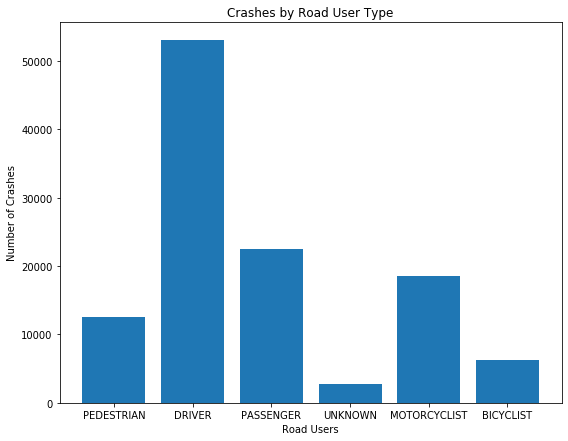

In [16]:
def displayBarChartOfCounts(data, title, xLabel, yLabel):
    labels = findUniqueObjects(data)

    crashFreq = []
    crashes = countObjects(data)
    for x in labels:
        crashFreq.append(crashes[x])

    x_pos = np.arange(len(crashFreq))

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.bar(x_pos, crashFreq, align='center')

    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)

    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)

displayBarChartOfCounts(data_dict['Road_User'], "Crashes by Road User Type", "Road Users", "Number of Crashes")

---
## **Instruction 4**
We shall further examine statistics of the road accidents in the dataset. 
**Your tasks here are:**
1. Write your code to print the number of males and females involved in accidents in the dataset. (**3 marks**)
2. Write your code to create indices of records for males and females in the dataset (**2 marks**)
3. Write your code to plot a histogram of number of accidents by age for females and males separately. Use 10-year bins. Plot both distributions on the same plot. (**2 marks**)
4. Briefly describe the meaning of the obtained results. (**3 marks**)

[**Total mark: 10**]

In [17]:
print(countObjects(data_dict['Gender']))


{'MALE': 66310, 'FEMALE': 49173, '??????': 58}


In [18]:
def findIndexOf(data_dict, column, condition):
    itemList = []
    for x in range(len(data_dict['Index'])):
        if data_dict[column][x] == condition:
            itemList.append(x)
    return itemList

maleList = findIndexOf(data_dict, 'Gender', 'MALE')
print(len(maleList))
femaleList = findIndexOf(data_dict, 'Gender', 'FEMALE')
print(len(femaleList))
otherList = findIndexOf(data_dict, 'Gender', '??????')
print(len(otherList))

66310
49173
58


Text(0, 0.5, 'Number of participants')

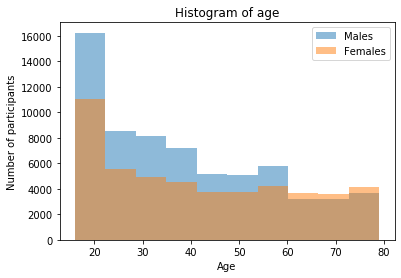

In [19]:
maleAge = data_dict['Age'][maleList]
femaleAge = data_dict['Age'][femaleList]

plt.hist(maleAge, label='Males',alpha=0.5)
plt.hist(femaleAge, label='Females',alpha=0.5)

plt.legend()

plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Number of participants')



In [20]:
# Men under 60 are more likely to crash than women of the same age
# Women over 60 are slightly more likely to crash than men of the same age
# At ages when men are more likely to crash 

---
## **Instruction 5**

**Your tasks**:

1. Define a function called **compute_time_day_year** that takes Year, Crash_Month, Crash_Day and Crash_Time as the inputs and returns day of week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday), time of the day (Morning - 06:00-11:59, Afternoon - 12:00-17:59, Evening - 18:00-23:59, Night - 00:00 - 05:59), and season of the year (Winter for June, July and August; Spring for September, October, November; Summer for December, January, February; Autumn for March, April, May). If either of the input parameters is in incorrect form, the function returns `INVALID` in all outputs.  (**4 marks**)
2. Write your code to calculate an array containing the day of week, the time of the day and the season of the year for all accident records. Print the first 10 entries in the array. (**2 marks**)
3. Construct a new array called **valid_DTS_list** to store only valid entries and then print out the number of elements in the array. (**3 marks**)
4. Compute the accident numbers for each of the days of week in the dataset and plot them as a bar chart. Also, print minimum, maximum, mean and median of the computed accident numbers. (**1 mark**)
5. Compute the accident numbers for each of the seasons (Summer, Autumn, Winter, Spring) in the dataset and plot them as a bar chart. (**1 mark**)
6. Compute the accident numbers with Injury_Severity equal to 1 for each of the times of the day (Morning, Afternoon, Evening, Night) in the dataset and plot them as a bar chart. (**1 mark**)
7. Why is the median of the accident numbers integer and the mean is not? Write a brief answer. (**3 marks**)

[**Total mark: 15**]

In [21]:
def computeTimeDayYear(year, month, day, time):
    intMonth = int(month)
    intDay = int(day)
    strTime = ''
    
    x = True
    count = 0
    while x:
        if time[count] == ':':
            x = False
        elif time[count] in ['0','1','2','3','4','5','6','7','8','9']:
            strTime = strTime + time[count]
            count += 1
        else:
            return 'INVALID','INVALID1','INVALID'
    intTime = int(strTime)

    days = ['Monday', 
            'Tuesday', 
            'Wednesday', 
            'Thursday', 
            'Friday', 
            'Saturday', 
            'Sunday']
    
    if intMonth in [12,1,2]:
        endSeason = 'Summer'
    elif intMonth in [3,4,5]:
        endSeason = 'Autumn'
    elif intMonth in [6,7,8]:
        endSeason = 'Winter'
    elif intMonth in [9,10,11]:
        endSeason = 'Spring'
    else:
        return 'INVALID','INVALID2','INVALID'
    
    if intDay in range(1,8):
        endDay = days[intDay - 1]
    else:
        return 'INVALID','INVALID3','INVALID'
    
    if intTime in [6,7,8,9,10,11]:
        endTime = 'Morning'
    elif intTime in [12,13,14,15,16,17]:
        endTime = 'Afternoon'
    elif intTime in [18,19,20,21,22,23]:
        endTime = 'Evening'
    elif intTime in [0,1,2,3,4,5]:
        endTime = 'Night'
    else:
        return 'INVALID','INVALID4','INVALID'
    
    return endDay, endTime, endSeason
    

print(computeTimeDayYear('2019', '12', '7', '12:30:59'))

('Sunday', 'Afternoon', 'Summer')


In [22]:
def listTimes(data_dict):
    listOfTimes = []
    for i in range(0, len(data_dict['Index'])):
        try:
            listOfTimes.append(computeTimeDayYear(data_dict['Year'][i], 
                               data_dict['Crash_Month'][i], 
                               data_dict['Crash_Day'][i], 
                               data_dict['Crash_Time'][i]))
        except:
            break
    return listOfTimes

def printX(inList, x):
    for i in range(x):
        print(inList[i])

printX(listTimes(data_dict), 10)

('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')
('Monday', 'Night', 'Summer')


In [23]:
def checkValidity(inList):
    validList = []
    invalidIndexList = []
    invalidReasonList = []
    for i in range(len(inList)):
        if inList[i][0] != 'INVALID':
            validList.append(inList[i])
        else:
            invalidIndexList.append(i)
            invalidReasonList.append(inList[i][1])
    return validList, invalidIndexList, invalidReasonList

print(len(checkValidity(listTimes(data_dict))[0]))

111056


15865.142857142857
1659.6665266226937
17379
(18572, 'Sunday')
(13865, 'Tuesday')


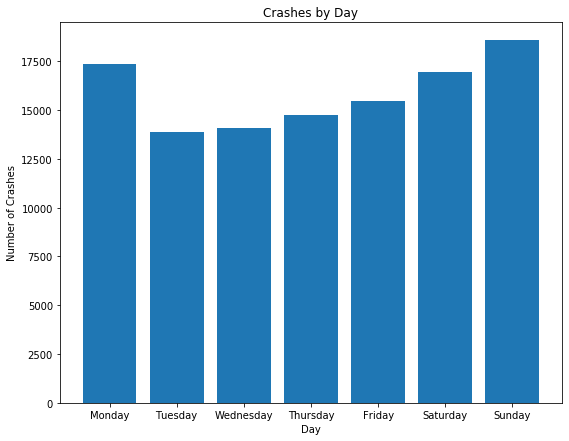

In [24]:
def takeIndexFromSubList(listOfLists, index):
    outList = []
    for i in listOfLists:
        outList.append(i[index])
    return outList

def convertDictToLists(inDict):
    keyList = []
    varList = []
    for i in inDict:
        keyList.append(i)
        varList.append(inDict[i])
    return keyList, varList

def calcDictMean(data):
    countDict = countObjects(data)
    keyList, varList = convertDictToLists(countDict)
    mean = calcMean(varList)
    return mean

def calcDictStdDev(data):
    countDict = countObjects(data)
    keyList, varList = convertDictToLists(countDict)
    StdDev = calcStdDev(varList)
    return StdDev

def calcDictMedian(data):
    countDict = countObjects(data)
    keyList, varList = convertDictToLists(countDict)
    Median = calcMedian(varList)
    return Median

def findDictMax(data, keys):
    countDict = countObjects(data)
    keyList, varList = convertDictToLists(countDict)
    Max, index = findMax(varList)
    key = keys[index]
    return Max, key

def findDictMin(data, keys):
    countDict = countObjects(data)
    keyList, varList = convertDictToLists(countDict)
    Min, index = findMin(varList)
    key = keys[index]
    return Min, key


print(calcDictMean(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0)))
print(calcDictStdDev(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0)))
print(calcDictMedian(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0)))

days = ['Monday', 
        'Tuesday', 
        'Wednesday', 
        'Thursday', 
        'Friday', 
        'Saturday', 
        'Sunday']

print(findDictMax(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0), days))
print(findDictMin(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0), days))

displayBarChartOfCounts(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 0), 
                        "Crashes by Day", 
                        "Day", 
                        "Number of Crashes")


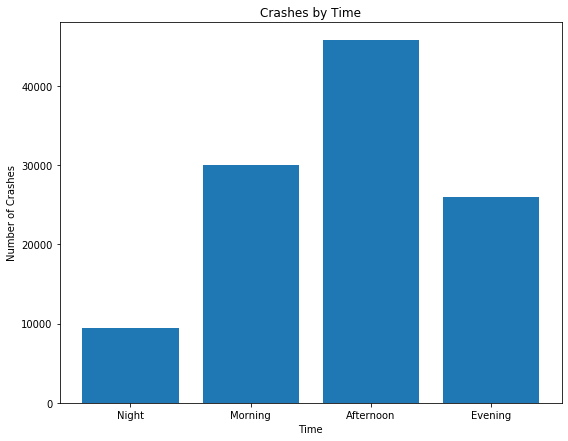

In [25]:
displayBarChartOfCounts(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 1), 
                        "Crashes by Time", 
                        "Time", 
                        "Number of Crashes")

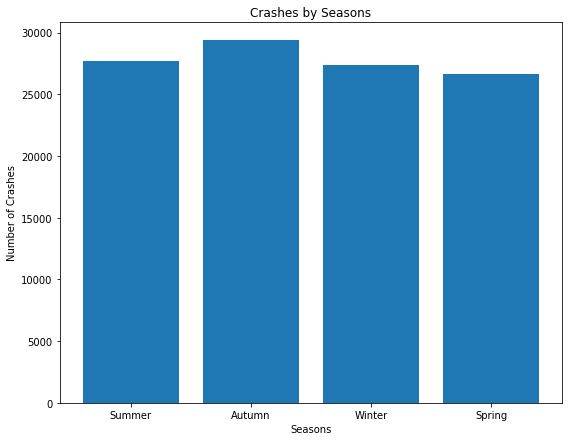

In [26]:
displayBarChartOfCounts(takeIndexFromSubList(checkValidity(listTimes(data_dict))[0], 2), 
                        "Crashes by Seasons", 
                        "Seasons", 
                        "Number of Crashes")


In [27]:
# Why is the median of the accident numbers integer and the mean is not? Write a brief answer.

# the median of a set of numbers is the middle value in the set and in a set of integers it will always be an integer
# the mean is calculated as the sum of all items in the set divided by the number of items in the set and isn't always an integer even if it comes from a set of integers

---
## **Instruction 6**
Continue from the previous steps, **your tasks are:**

1. Write your code to find and print all the invalid entry indices. An entry is invalid if it has been marked as `INVALID` by **compute_time_day_year** function. Also print how many invalid entries are in the dataset. (**2 marks**)
2. Write your code to filter out all invalid entries and store your data into a new variable **data_dict_cleaned** and print out the number of data records after being cleaned. (**2 marks**)

3. Define a function, which takes a time string in form `%H:%M:%S` as an input and computes time in hours since 
midnight. Note that the time in hours does not have to be integer. (**3 marks**)

4.  Write your code to produce a scatter plot of age of a person involved in a car accident vs time since midnight for that accident. Use the data for year 2005 only. (**3 marks**)

[**Total mark: 10**]

In [28]:
def printTableIndecies(inList):
    for i in inList:
        print(data_dict['Index'][i],
              data_dict['Age'][i],
              data_dict['Year'][i],
              data_dict['Crash_Month'][i],
              data_dict['Crash_Day'][i],
              data_dict['Crash_Time'][i],
              data_dict['Road_User'][i],
              data_dict['Gender'][i],
              data_dict['Crash_Type'][i],
              data_dict['Injury_Severity'][i],
              data_dict['Crash_LGA'][i],
              data_dict['Crash_Area_Type'][i])

invalidList, invalidReasonList = checkValidity(listTimes(data_dict))[1:]

print(len(invalidList))
printTableIndecies(invalidList)

4485
659 77 2000 2 4 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 1 INDIGO RURAL VIC
732 21 2000 2 5 UNKNOWN PEDESTRIAN FEMALE UNKNOWN 0 YARRA MELBOURNE
869 30 2000 2 7 UNKNOWN DRIVER MALE UNKNOWN 0 ALPINE RURAL VIC
870 23 2000 2 7 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 1 SOUTH GIPPSLAND RURAL VIC
1102 61 2000 3 3 UNKNOWN DRIVER FEMALE UNKNOWN 0 GREATER SHEPPARTON RURAL VIC
1103 75 2000 3 3 UNKNOWN DRIVER MALE UNKNOWN 0 MITCHELL RURAL VIC
1388 21 2000 3 7 UNKNOWN PEDESTRIAN FEMALE UNKNOWN 0 YARRA MELBOURNE
1455 19 2000 4 1 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 1 HORSHAM RURAL VIC
1548 44 2000 4 3 UNKNOWN PEDESTRIAN MALE UNKNOWN 0 MARIBYRNONG MELBOURNE
1883 20 2000 5 1 UNKNOWN UNKNOWN MALE PASSENGER/MISC 0 GANNAWARRA RURAL VIC
2188 21 2000 5 5 UNKNOWN PASSENGER MALE PASSENGER/MISC 1 BRIMBANK MELBOURNE
2737 34 2000 6 5 UNKNOWN PEDESTRIAN MALE UNKNOWN 0 YARRA MELBOURNE
2738 67 2000 6 5 UNKNOWN PEDESTRIAN FEMALE PEDESTRIAN 0 HORSHAM RURAL VIC
2910 21 2000 6 7 UNKNOWN DRIVER MALE 

33072 62 2005 9 1 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 1 NORTHERN GRAMPIANS RURAL VIC
33175 36 2005 9 3 UNKNOWN BICYCLIST MALE UNKNOWN 0 WYNDHAM MELBOURNE
33374 23 2005 9 6 UNKNOWN DRIVER MALE OPPOSING DIRECTION 1 NILLUMBIK MELBOURNE
33555 22 2005 10 1 UNKNOWN PASSENGER MALE UNKNOWN 0 GREATER GEELONG RURAL VIC
33556 27 2005 10 1 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 NORTHERN GRAMPIANS RURAL VIC
33557 17 2005 10 1 UNKNOWN PASSENGER FEMALE UNKNOWN 0 MACEDON RANGES RURAL VIC
33611 54 2005 10 2 UNKNOWN DRIVER FEMALE UNKNOWN 0 MORNINGTON PENINSULA MELBOURNE
33664 55 2005 10 3 UNKNOWN PEDESTRIAN MALE UNKNOWN 1 MAROONDAH MELBOURNE
33706 50 2005 10 4 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 1 STONNINGTON MELBOURNE
33759 32 2005 10 5 UNKNOWN UNKNOWN MALE UNKNOWN 0 ALPINE RURAL VIC
34266 73 2005 11 6 UNKNOWN PASSENGER MALE UNKNOWN 0 MARIBYRNONG MELBOURNE
34267 74 2005 11 6 UNKNOWN PASSENGER MALE UNKNOWN 1 WANGARATTA RURAL VIC
34464 34 2005 12 2 UNKNOWN DRIVER M

49006 41 2008 6 7 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 GREATER DANDENONG MELBOURNE
49007 53 2008 6 7 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 GREATER DANDENONG MELBOURNE
49074 23 2008 7 1 UNKNOWN UNKNOWN MALE UNKNOWN 0 UNKNOWN UNKNOWN
49075 35 2008 7 1 UNKNOWN UNKNOWN FEMALE RUN OFF A STRAIGHT ROAD 0 UNKNOWN UNKNOWN
49076 59 2008 7 1 UNKNOWN UNKNOWN MALE UNKNOWN 0 UNKNOWN UNKNOWN
49077 49 2008 7 1 UNKNOWN UNKNOWN FEMALE UNKNOWN 0 UNKNOWN UNKNOWN
49078 27 2008 7 1 UNKNOWN PASSENGER FEMALE RUN OFF ROAD ON A CURVE 1 CARDINIA MELBOURNE
49079 29 2008 7 1 UNKNOWN PASSENGER FEMALE RUN OFF ROAD ON A CURVE 1 CARDINIA MELBOURNE
49080 31 2008 7 1 UNKNOWN PASSENGER FEMALE RUN OFF ROAD ON A CURVE 0 CARDINIA MELBOURNE
49132 53 2008 7 2 UNKNOWN UNKNOWN MALE UNKNOWN 0 UNKNOWN UNKNOWN
49133 24 2008 7 2 UNKNOWN UNKNOWN FEMALE UNKNOWN 0 UNKNOWN UNKNOWN
49134 27 2008 7 2 UNKNOWN UNKNOWN FEMALE UNKNOWN 0 UNKNOWN UNKNOWN
49189 37 2008 7 3 UNKNOWN UNKNOWN MALE UNKNOWN 0 UNKNOWN UNKNOWN
492

53255 24 2009 4 1 UNKNOWN PEDESTRIAN MALE RUN OFF A STRAIGHT ROAD 0 MELBOURNE MELBOURNE
53256 32 2009 4 1 UNKNOWN PASSENGER FEMALE UNKNOWN 0 BRIMBANK MELBOURNE
53257 22 2009 4 1 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 BOROONDARA MELBOURNE
53258 34 2009 4 1 UNKNOWN BICYCLIST MALE SAME DIRECTION 0 PORT PHILLIP MELBOURNE
53259 40 2009 4 1 UNKNOWN MOTORCYCLIST MALE UNKNOWN 0 BAW BAW RURAL VIC
53260 24 2009 4 1 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 1 MORNINGTON PENINSULA MELBOURNE
53261 26 2009 4 1 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 BASS COAST RURAL VIC
53326 58 2009 4 2 UNKNOWN UNKNOWN FEMALE UNKNOWN 0 UNKNOWN UNKNOWN
53327 55 2009 4 2 UNKNOWN DRIVER MALE SAME DIRECTION 0 GLEN EIRA MELBOURNE
53328 75 2009 4 2 UNKNOWN DRIVER FEMALE SAME DIRECTION 1 GREATER GEELONG RURAL VIC
53329 34 2009 4 2 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 MELTON MELBOURNE
53386 50 2009 4 3 UNKNOWN BICYCLIST MALE UNKNOWN 0 UNKNOWN UNKNOWN
53387 60 2009 4 3 UNKNOWN PEDESTRIAN MALE PASSENGER/MISC 0

55778 63 2009 9 3 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 YARRA RANGES MELBOURNE
55817 18 2009 9 4 UNKNOWN PASSENGER FEMALE OPPOSING DIRECTION 0 BRIMBANK MELBOURNE
55818 22 2009 9 4 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 GREATER DANDENONG MELBOURNE
55819 40 2009 9 4 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 GREATER DANDENONG MELBOURNE
55820 29 2009 9 4 UNKNOWN PEDESTRIAN MALE PASSENGER/MISC 0 GLEN EIRA MELBOURNE
55821 37 2009 9 4 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 GREATER BENDIGO RURAL VIC
55822 20 2009 9 4 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 WELLINGTON RURAL VIC
55874 23 2009 9 5 UNKNOWN BICYCLIST MALE ADJACENT DIRECTION 0 MONASH MELBOURNE
55875 44 2009 9 5 UNKNOWN DRIVER MALE ON ROAD 0 MOYNE RURAL VIC
55932 27 2009 9 6 UNKNOWN MOTORCYCLIST MALE UNKNOWN 1 UNKNOWN UNKNOWN
55933 61 2009 9 6 UNKNOWN DRIVER MALE OPPOSING DIRECTION 0 BOROONDARA MELBOURNE
55934 22 2009 9 6 UNKNOWN PASSENGER MALE SAME DIRECTION 0 MONASH MELBOURNE
55935 16 2009 9 6 UNK

58651 79 2010 4 1 UNKNOWN PASSENGER FEMALE OPPOSING DIRECTION 0 WHITTLESEA MELBOURNE
58652 75 2010 4 1 UNKNOWN PASSENGER MALE OPPOSING DIRECTION 0 WHITTLESEA MELBOURNE
58653 22 2010 4 1 UNKNOWN PEDESTRIAN FEMALE PEDESTRIAN 1 WHITEHORSE MELBOURNE
58654 31 2010 4 1 UNKNOWN DRIVER FEMALE OPPOSING DIRECTION 1 YARRA RANGES MELBOURNE
58655 36 2010 4 1 UNKNOWN DRIVER FEMALE OPPOSING DIRECTION 0 GLEN EIRA MELBOURNE
58656 21 2010 4 1 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 UNKNOWN UNKNOWN
58657 19 2010 4 1 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 1 UNKNOWN UNKNOWN
58658 22 2010 4 1 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 GREATER GEELONG RURAL VIC
58659 17 2010 4 1 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 MITCHELL RURAL VIC
58660 18 2010 4 1 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 1 WANGARATTA RURAL VIC
58661 46 2010 4 1 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 MANSFIELD RURAL VIC
58700 52 2010 4 2 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 SOUTHERN GR

61467 58 2010 10 2 UNKNOWN DRIVER FEMALE ON ROAD 0 MAROONDAH MELBOURNE
61468 26 2010 10 2 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 CAMPASPE RURAL VIC
61509 69 2010 10 3 UNKNOWN MOTORCYCLIST FEMALE UNKNOWN 1 MELBOURNE MELBOURNE
61510 43 2010 10 3 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 HUME MELBOURNE
61511 78 2010 10 3 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 FRANKSTON MELBOURNE
61512 75 2010 10 3 UNKNOWN DRIVER MALE OVERTAKING 0 ALPINE RURAL VIC
61513 70 2010 10 3 UNKNOWN PASSENGER FEMALE OVERTAKING 0 ALPINE RURAL VIC
61574 30 2010 10 4 UNKNOWN BICYCLIST MALE SAME DIRECTION 0 MELBOURNE MELBOURNE
61575 27 2010 10 4 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 HUME MELBOURNE
61576 76 2010 10 4 UNKNOWN PEDESTRIAN MALE MANOEUVRING 1 YARRA MELBOURNE
61577 50 2010 10 4 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 FRANKSTON MELBOURNE
61634 48 2010 10 5 UNKNOWN PASSENGER MALE OPPOSING DIRECTION 0 MANNINGHAM MELBOURNE
61635 59 2010 10 5 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 GREATER GEELONG RURAL

64204 69 2011 4 1 UNKNOWN DRIVER MALE PASSENGER/MISC 0 YARRA RANGES MELBOURNE
64246 30 2011 4 2 UNKNOWN MOTORCYCLIST MALE SAME DIRECTION 0 DAREBIN MELBOURNE
64247 35 2011 4 2 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 1 MITCHELL RURAL VIC
64248 17 2011 4 2 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 MITCHELL RURAL VIC
64302 32 2011 4 3 UNKNOWN BICYCLIST FEMALE ON ROAD 0 MELBOURNE MELBOURNE
64303 40 2011 4 3 UNKNOWN DRIVER MALE UNKNOWN 0 MOORABOOL RURAL VIC
64304 37 2011 4 3 UNKNOWN PASSENGER FEMALE MANOEUVRING 0 GREATER BENDIGO RURAL VIC
64362 71 2011 4 4 UNKNOWN BICYCLIST MALE ADJACENT DIRECTION 1 BRIMBANK MELBOURNE
64363 57 2011 4 4 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 KNOX MELBOURNE
64364 24 2011 4 4 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 LATROBE RURAL VIC
64365 24 2011 4 4 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 1 MORNINGTON PENINSULA MELBOURNE
64366 19 2011 4 4 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 1 MORNINGTON PENINSULA MELBOURNE
64367 27 2011 4 4 UN

68153 23 2011 12 2 UNKNOWN DRIVER MALE ADJACENT DIRECTION 0 BOROONDARA MELBOURNE
68154 62 2011 12 2 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 0 WHITTLESEA MELBOURNE
68216 21 2011 12 3 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 WHITEHORSE MELBOURNE
68217 35 2011 12 3 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 PORT PHILLIP MELBOURNE
68276 20 2011 12 4 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 HOBSONS BAY MELBOURNE
68277 68 2011 12 4 UNKNOWN DRIVER MALE SAME DIRECTION 0 HOBSONS BAY MELBOURNE
68278 35 2011 12 4 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 1 WYNDHAM MELBOURNE
68279 23 2011 12 4 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 YARRA MELBOURNE
68280 73 2011 12 4 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 WHITEHORSE MELBOURNE
68281 61 2011 12 4 UNKNOWN DRIVER MALE ADJACENT DIRECTION 0 MONASH MELBOURNE
68282 45 2011 12 4 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 EAST GIPPSLAND RURAL VIC
68338 52 2011 12 5 UNKNOWN DRIVER MALE ON ROAD 0 MELBOURNE MELBOURNE
68339 

72365 35 2012 8 5 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 MOONEE VALLEY MELBOURNE
72366 79 2012 8 5 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 MONASH MELBOURNE
72367 17 2012 8 5 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 BENALLA RURAL VIC
72368 63 2012 8 5 UNKNOWN DRIVER MALE UNKNOWN 0 MORNINGTON PENINSULA MELBOURNE
72369 21 2012 8 5 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 SOUTH GIPPSLAND RURAL VIC
72416 29 2012 8 6 UNKNOWN PEDESTRIAN FEMALE PEDESTRIAN 0 MELBOURNE MELBOURNE
72417 18 2012 8 6 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 MAROONDAH MELBOURNE
72418 30 2012 8 6 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 MONASH MELBOURNE
72419 21 2012 8 6 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 GREATER BENDIGO RURAL VIC
72420 69 2012 8 6 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 BULOKE RURAL VIC
72421 56 2012 8 6 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 MITCHELL RURAL VIC
72422 20 2012 8 6 UNKNOWN DRIVER FEMALE RUN OFF ROAD ON A CURVE 0 MURRINDINDI RURAL VIC
72423 70 2

74959 54 2013 3 1 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 UNKNOWN UNKNOWN
74960 59 2013 3 1 UNKNOWN PEDESTRIAN FEMALE MANOEUVRING 1 SOUTHERN GRAMPIANS RURAL VIC
74961 47 2013 3 1 UNKNOWN DRIVER MALE PASSENGER/MISC 0 GLENELG RURAL VIC
74962 43 2013 3 1 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 ALPINE RURAL VIC
74963 17 2013 3 1 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 EAST GIPPSLAND RURAL VIC
75019 61 2013 3 2 UNKNOWN PEDESTRIAN FEMALE PASSENGER/MISC 0 MAROONDAH MELBOURNE
75020 64 2013 3 2 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 PYRENEES RURAL VIC
75021 23 2013 3 2 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 WHITTLESEA MELBOURNE
75022 51 2013 3 2 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 YARRA RANGES MELBOURNE
75023 16 2013 3 2 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 0 LATROBE RURAL VIC
75082 47 2013 3 3 UNKNOWN DRIVER FEMALE PEDESTRIAN 1 BANYULE MELBOURNE
75083 49 2013 3 3 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 EAST GIPPSL

78948 24 2013 11 3 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 MILDURA RURAL VIC
78949 20 2013 11 3 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 CASEY MELBOURNE
79018 33 2013 11 4 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 BOROONDARA MELBOURNE
79019 76 2013 11 4 UNKNOWN PASSENGER FEMALE UNKNOWN 1 WHITEHORSE MELBOURNE
79088 32 2013 11 5 UNKNOWN DRIVER MALE PASSENGER/MISC 0 UNKNOWN UNKNOWN
79089 16 2013 11 5 UNKNOWN PEDESTRIAN MALE UNKNOWN 0 WYNDHAM MELBOURNE
79090 31 2013 11 5 UNKNOWN MOTORCYCLIST MALE PASSENGER/MISC 0 WHITTLESEA MELBOURNE
79091 34 2013 11 5 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 0 UNKNOWN UNKNOWN
79171 55 2013 11 6 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 WHITTLESEA MELBOURNE
79172 35 2013 11 6 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 PORT PHILLIP MELBOURNE
79173 33 2013 11 6 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 0 MELTON MELBOURNE
79260 20 2013 11 7 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 MANNINGHAM MELBOURNE
79261 28 2013 11 7 UNKNOWN MOT

83761 26 2014 8 7 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 YARRA RANGES MELBOURNE
83819 24 2014 9 1 UNKNOWN MOTORCYCLIST MALE OPPOSING DIRECTION 0 MELBOURNE MELBOURNE
83820 17 2014 9 1 UNKNOWN PASSENGER MALE RUN OFF ROAD ON A CURVE 1 HUME MELBOURNE
83821 58 2014 9 1 UNKNOWN MOTORCYCLIST FEMALE RUN OFF A STRAIGHT ROAD 0 EAST GIPPSLAND RURAL VIC
83822 27 2014 9 1 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 MORNINGTON PENINSULA MELBOURNE
83823 21 2014 9 1 UNKNOWN PASSENGER FEMALE RUN OFF A STRAIGHT ROAD 1 MORNINGTON PENINSULA MELBOURNE
83824 48 2014 9 1 UNKNOWN DRIVER FEMALE RUN OFF A STRAIGHT ROAD 0 WELLINGTON RURAL VIC
83875 36 2014 9 2 UNKNOWN PEDESTRIAN MALE UNKNOWN 0 BRIMBANK MELBOURNE
83876 74 2014 9 2 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 0 BANYULE MELBOURNE
83929 17 2014 9 3 UNKNOWN PASSENGER MALE OPPOSING DIRECTION 0 YARRA RANGES MELBOURNE
83930 31 2014 9 3 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 MORNINGTON PENINSULA MELBOURNE
83931 32 2014 9 3 UNKNOWN UN

89390 53 2015 8 1 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 1 YARRA RANGES MELBOURNE
89391 41 2015 8 1 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 STONNINGTON MELBOURNE
89392 68 2015 8 1 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 MONASH MELBOURNE
89393 57 2015 8 1 UNKNOWN DRIVER FEMALE OPPOSING DIRECTION 0 MACEDON RANGES RURAL VIC
89394 47 2015 8 1 UNKNOWN MOTORCYCLIST MALE ON ROAD 0 YARRA RANGES MELBOURNE
89433 47 2015 8 2 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 GREATER GEELONG RURAL VIC
89488 62 2015 8 3 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 KINGSTON MELBOURNE
89550 27 2015 8 4 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 YARRA RANGES MELBOURNE
89551 41 2015 8 4 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 KNOX MELBOURNE
89552 30 2015 8 4 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 YARRA RANGES MELBOURNE
89697 58 2015 8 6 UNKNOWN DRIVER FEMALE OPPOSING DIRECTION 1 HOBSONS BAY MELBOURNE
89698 23 2015 8 6 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 GLEN EIRA

95590 36 2016 6 7 UNKNOWN PASSENGER FEMALE SAME DIRECTION 0 PORT PHILLIP MELBOURNE
95591 52 2016 6 7 UNKNOWN DRIVER MALE ADJACENT DIRECTION 0 STONNINGTON MELBOURNE
95592 16 2016 6 7 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 KINGSTON MELBOURNE
95593 65 2016 6 7 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 CASEY MELBOURNE
95594 40 2016 6 7 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 LATROBE RURAL VIC
95678 18 2016 7 1 UNKNOWN PASSENGER MALE ON ROAD 0 UNKNOWN UNKNOWN
95679 73 2016 7 1 UNKNOWN UNKNOWN MALE OPPOSING DIRECTION 0 FRANKSTON MELBOURNE
95680 72 2016 7 1 UNKNOWN DRIVER FEMALE OPPOSING DIRECTION 1 FRANKSTON MELBOURNE
95681 46 2016 7 1 UNKNOWN MOTORCYCLIST MALE RUN OFF A STRAIGHT ROAD 0 SURF COAST RURAL VIC
95682 59 2016 7 1 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 1 GLENELG RURAL VIC
95683 36 2016 7 1 UNKNOWN DRIVER MALE RUN OFF ROAD ON A CURVE 0 CENTRAL GOLDFIELDS RURAL VIC
95684 23 2016 7 1 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 GREATER BENDIGO RURAL VIC
95685 48 2016 7 1 UNKNOWN DRI

100141 27 2017 2 5 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 PORT PHILLIP MELBOURNE
100142 20 2017 2 5 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 SOUTH GIPPSLAND RURAL VIC
100234 28 2017 2 6 UNKNOWN DRIVER MALE UNKNOWN 0 GLEN EIRA MELBOURNE
100235 47 2017 2 6 UNKNOWN DRIVER FEMALE RUN OFF ROAD ON A CURVE 0 GREATER GEELONG RURAL VIC
100324 28 2017 2 7 UNKNOWN MOTORCYCLIST MALE ON ROAD 1 YARRA RANGES MELBOURNE
100325 30 2017 2 7 UNKNOWN DRIVER MALE ADJACENT DIRECTION 0 GREATER DANDENONG MELBOURNE
100326 21 2017 2 7 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 MURRINDINDI RURAL VIC
100434 56 2017 3 1 UNKNOWN BICYCLIST FEMALE ON ROAD 0 GLEN EIRA MELBOURNE
100435 16 2017 3 1 UNKNOWN UNKNOWN MALE OPPOSING DIRECTION 0 KINGSTON MELBOURNE
100436 17 2017 3 1 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 GREATER GEELONG RURAL VIC
100437 23 2017 3 1 UNKNOWN DRIVER MALE OPPOSING DIRECTION 1 GREATER GEELONG RURAL VIC
100438 37 2017 3 1 UNKNOWN PASSENGER FEMALE UNKNOWN 0 BALLARAT RURAL VIC

106919 44 2017 12 7 UNKNOWN MOTORCYCLIST MALE RUN OFF ROAD ON A CURVE 0 HUME MELBOURNE
106920 17 2017 12 7 UNKNOWN PASSENGER MALE UNKNOWN 0 CARDINIA MELBOURNE
106921 77 2017 12 7 UNKNOWN PASSENGER FEMALE OPPOSING DIRECTION 0 CASEY MELBOURNE
107032 54 2018 1 1 UNKNOWN BICYCLIST MALE UNKNOWN 0 UNKNOWN UNKNOWN
107033 26 2018 1 1 UNKNOWN DRIVER FEMALE ON ROAD 0 MORELAND MELBOURNE
107034 38 2018 1 1 UNKNOWN PEDESTRIAN MALE PEDESTRIAN 0 YARRA MELBOURNE
107035 17 2018 1 1 UNKNOWN PASSENGER MALE SAME DIRECTION 0 GREATER DANDENONG MELBOURNE
107036 16 2018 1 1 UNKNOWN UNKNOWN FEMALE SAME DIRECTION 0 GREATER DANDENONG MELBOURNE
107037 17 2018 1 1 UNKNOWN UNKNOWN MALE SAME DIRECTION 0 GREATER DANDENONG MELBOURNE
107038 50 2018 1 1 UNKNOWN DRIVER MALE UNKNOWN 1 MELTON MELBOURNE
107111 51 2018 1 2 UNKNOWN BICYCLIST MALE PEDESTRIAN 0 MORELAND MELBOURNE
107200 38 2018 1 3 UNKNOWN DRIVER FEMALE SAME DIRECTION 0 WYNDHAM MELBOURNE
107293 37 2018 1 4 UNKNOWN DRIVER FEMALE UNKNOWN 0 UNKNOWN UNKNOWN
107294 

110785 23 2018 6 4 UNKNOWN DRIVER MALE RUN OFF A STRAIGHT ROAD 0 YARRA RANGES MELBOURNE
110865 29 2018 6 5 UNKNOWN PEDESTRIAN FEMALE UNKNOWN 0 MELBOURNE MELBOURNE
110866 22 2018 6 5 UNKNOWN PASSENGER MALE RUN OFF A STRAIGHT ROAD 0 HUME MELBOURNE
110867 50 2018 6 5 UNKNOWN MOTORCYCLIST FEMALE MANOEUVRING 0 MELBOURNE MELBOURNE
110868 38 2018 6 5 UNKNOWN DRIVER MALE ON ROAD 0 HUME MELBOURNE
110869 35 2018 6 5 UNKNOWN PASSENGER FEMALE SAME DIRECTION 0 MANNINGHAM MELBOURNE
110870 70 2018 6 5 UNKNOWN DRIVER FEMALE UNKNOWN 0 MANNINGHAM MELBOURNE
110871 54 2018 6 5 UNKNOWN DRIVER MALE OPPOSING DIRECTION 0 YARRA MELBOURNE
110872 46 2018 6 5 UNKNOWN PASSENGER MALE ADJACENT DIRECTION 0 GREATER GEELONG RURAL VIC
110873 59 2018 6 5 UNKNOWN DRIVER FEMALE ADJACENT DIRECTION 0 GREATER GEELONG RURAL VIC
110874 29 2018 6 5 UNKNOWN DRIVER MALE UNKNOWN 0 MOORABOOL RURAL VIC
110968 36 2018 6 6 UNKNOWN DRIVER MALE OPPOSING DIRECTION 0 MOONEE VALLEY MELBOURNE
110969 48 2018 6 6 UNKNOWN PEDESTRIAN MALE RUN OF

In [29]:
def cleanData(data_dict, invalidList):
    columns = {'Index',
               'Age',
               'Year',
               'Crash_Month',
               'Crash_Day',
               'Crash_Time',
               'Road_User',
               'Gender',
               'Crash_Type',
               'Injury_Severity',
               'Crash_LGA',
               'Crash_Area_Type'}
    itemsDict = {}
    for i in columns:
        itemsDict[i] = []
    for i in range(len(data_dict['Index'])):
        if not(i in invalidList):
            itemsDict['Index'].append(data_dict['Index'][i])
            itemsDict['Age'].append(data_dict['Age'][i])
            itemsDict['Year'].append(data_dict['Year'][i])
            itemsDict['Crash_Month'].append(data_dict['Crash_Month'][i])
            itemsDict['Crash_Day'].append(data_dict['Crash_Day'][i])
            itemsDict['Crash_Time'].append(data_dict['Crash_Time'][i])
            itemsDict['Road_User'].append(data_dict['Road_User'][i])
            itemsDict['Gender'].append(data_dict['Gender'][i])
            itemsDict['Crash_Type'].append(data_dict['Crash_Type'][i])
            itemsDict['Injury_Severity'].append(data_dict['Injury_Severity'][i])
            itemsDict['Crash_LGA'].append(data_dict['Crash_LGA'][i])
            itemsDict['Crash_Area_Type'].append(data_dict['Crash_Area_Type'][i])
    return itemsDict

data_dict_cleaned = cleanData(data_dict, invalidList)
print(len(data_dict_cleaned['Index']))

111056


In [30]:
def strToTime(inStr):
    time = inStr.split(':')
    hour = int(time[0])
    minute = int(time[1])
    second = int(time[2])
    outTime = [hour, minute, second]
    return outTime

def hoursSinceMidnight(inTime):
    hoursPast = inTime[2] * 0.0002777777777778
    hoursPast += inTime[1] * 0.01666666666667
    hoursPast += inTime[0]
    return hoursPast

print(hoursSinceMidnight(strToTime('0:48:16')))

0.8044444444446048


Text(0, 0.5, 'Time Since Midnight')

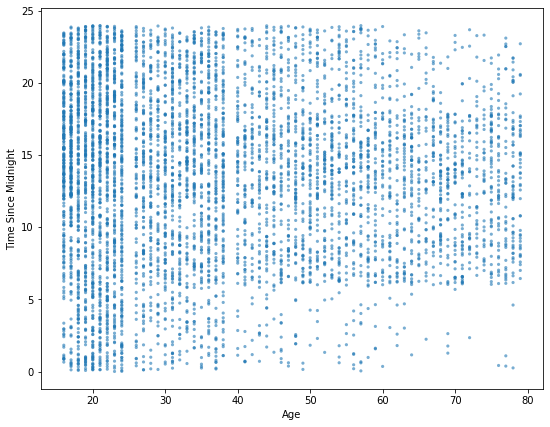

In [31]:
def findValuesOfIndexInColumn(data_dict, indexList, column):
    outList = []
    for i in indexList:
        outList.append(data_dict[column][i])
    return outList

crash2005 = findIndexOf(data_dict_cleaned, 'Year', 2005)


rawTimes = findValuesOfIndexInColumn(data_dict_cleaned, crash2005, 'Crash_Time')
times = []
for i in rawTimes:
    times.append(hoursSinceMidnight(strToTime(i)))

    
rawAges = findValuesOfIndexInColumn(data_dict_cleaned, crash2005, 'Age')
ages = []
for i in rawAges:
    ages.append(int(i))


fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(ages, times, alpha=0.6, edgecolor='none', s=10)
ax.set_xlabel('Age')
ax.set_ylabel('Time Since Midnight')

## **Instruction 7**
Think about the results above. Can you tell which fields in the dataset have been tampered with? Why do you think so? (**5 marks**)

[**Total mark: 5**]

In [ ]:
# The ages of around 25 and 39 have probably been tampered with. 
# I think this as there seems to have been no crashes by people 
# of that age which is bizzare as people of those ages are rather 
# likely to crash